In [1]:
import os
os.chdir("/usr/src/app")
import pandas as pd
from IPython.display import display, clear_output
import time

In [2]:
# Path dataframe
PATH_TENNIS_TV_VIDEOS = "deepsetstats/dataset/tennistv/parquet/tennistv_videos.parquet"

In [3]:
df = pd.read_parquet(PATH_TENNIS_TV_VIDEOS, engine="pyarrow")

In [4]:
# Get Highlights
dfh = df[df.title.str.contains("ighlights")]
dfh.reset_index(drop=True, inplace=True)

In [5]:
dfh

,title,video_id,date_publish
0,Novak Djokovic vs Alexander Zverev Extended Hi...,dsALS4dDxDs,2023-08-19T08:30:08Z
1,Alcaraz Battles Purcell; Djokovic Plays Fritz ...,l6Dx9KzyRig,2023-08-19T02:58:54Z
2,Taylor Fritz vs Novak Djokovic Highlights | Ci...,PBBvQm6xCuo,2023-08-19T02:24:18Z
3,Alexander Zverev vs Adrian Mannarino Quarter-F...,Tq99SCbjJN4,2023-08-19T00:44:01Z
4,Carlos Alcaraz vs Max Purcell Battle | Cincinn...,O2DVVIOvo9o,2023-08-18T22:15:55Z
...,...,...,...
3073,ATP Masters Series Hamburg 2008 Semi-Final Hig...,9HgBqH44c-8,2008-05-20T13:25:34Z
3074,ATP Masters Series Hamburg 2008 Final Highligh...,Hxiym30VT8Q,2008-05-19T08:35:00Z
3075,Sony Ericsson Open 2008 Final Highlights - Raf...,tvaYDyVXAww,2008-04-07T10:40:16Z
3076,Tennis Masters Cup Shanghai 2007 - Federer v F...,N_Es3ax5JKU,2007-11-19T09:29:39Z


# Prepare folder

In [6]:
import os

In [7]:
PATH_OUT_VIDEOS = "videos/tennistv"
EXTENSION = ".mp4"

# Temporal directory to save downloaded videos and final directory
os.makedirs(PATH_OUT_VIDEOS, exist_ok=True)

# Download video


In [8]:
import yt_dlp as youtube_dl

def download_video(video_id, path_out=PATH_OUT_VIDEOS):

    ydl_opts = {
        "format": "bestvideo[ext=mp4]/best[ext=mp4]",  # Download the best quality available
        "outtmpl": f"{PATH_OUT_VIDEOS}/{video_id}.%(ext)s",  # Specify the output template
    }
    
    # Create the downloader
    with youtube_dl.YoutubeDL(ydl_opts) as ydl:
        ydl.download([f"https://www.youtube.com/watch?v={video_id}"])

    return True

# Iterate on videos


In [47]:
l_videos_downloaded = os.listdir(PATH_OUT_VIDEOS)

# Set of already downloaded videos
s_videos_downloaded = set()

for vid in l_videos_downloaded:
    if vid.endswith(EXTENSION):
        vid_id = vid.split(EXTENSION)[0]
        s_videos_downloaded.add(vid_id)

In [48]:
d_success = {
    vid_id: True for vid_id in list(s_videos_downloaded)
}

In [49]:
len(d_success)

854

In [46]:
for i, row in dfh.iterrows():        
    vid_id = row["video_id"]

    # If video already downloaded, do not download it again
    if vid_id in d_success:
        continue
    if vid_id in s_videos_downloaded:
        continue

    if i in [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]:
        print("--" * 30)
        print(f"Iteration: {i}")
        print("--" * 30)
    elif (i % 50) == 0:
        print("--" * 30)
        print(f"Iteration: {i}")
        print("--" * 30)
        print("Sleeping")
        time.sleep(3000)

    # Download video
    print("--" * 30)
    print("DOWNLOADING VIDEO:", vid_id)
    print("--" * 30)
    tt = download_video(vid_id)
    if tt:
        d_success[vid_id] = True

------------------------------------------------------------
Iteration: 800
------------------------------------------------------------
------------------------------------------------------------
DOWNLOADING VIDEO: Kpx7B7V7dtg
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=Kpx7B7V7dtg
[youtube] Kpx7B7V7dtg: Downloading webpage


[youtube] Kpx7B7V7dtg: Downloading ios player API JSON
[youtube] Kpx7B7V7dtg: Downloading android player API JSON
[youtube] Kpx7B7V7dtg: Downloading iframe API JS
[youtube] Kpx7B7V7dtg: Downloading player c153b631
[youtube] Kpx7B7V7dtg: Downloading web player API JSON
[youtube] Kpx7B7V7dtg: Downloading m3u8 information


[youtube] Kpx7B7V7dtg: Downloading initial data API JSON
[info] Kpx7B7V7dtg: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 93
[download] Destination: videos/tennistv/Kpx7B7V7dtg.mp4
[download] 100% of  187.14MiB in 00:01:13 at 2.56MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: -YXx9Dh1DKE
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=-YXx9Dh1DKE
[youtube] -YXx9Dh1DKE: Downloading webpage


[youtube] -YXx9Dh1DKE: Downloading ios player API JSON
[youtube] -YXx9Dh1DKE: Downloading android player API JSON
[youtube] -YXx9Dh1DKE: Downloading iframe API JS
[youtube] -YXx9Dh1DKE: Downloading player c153b631
[youtube] -YXx9Dh1DKE: Downloading web player API JSON
[youtube] -YXx9Dh1DKE: Downloading m3u8 information


[youtube] -YXx9Dh1DKE: Downloading initial data API JSON
[info] -YXx9Dh1DKE: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 101
[download] Destination: videos/tennistv/-YXx9Dh1DKE.mp4
[download] 100% of  173.41MiB in 00:00:55 at 3.14MiB/s                      
------------------------------------------------------------
DOWNLOADING VIDEO: yD5moGi-cAw
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=yD5moGi-cAw
[youtube] yD5moGi-cAw: Downloading webpage


[youtube] yD5moGi-cAw: Downloading ios player API JSON
[youtube] yD5moGi-cAw: Downloading android player API JSON
[youtube] yD5moGi-cAw: Downloading iframe API JS
[youtube] yD5moGi-cAw: Downloading player c153b631
[youtube] yD5moGi-cAw: Downloading web player API JSON
[youtube] yD5moGi-cAw: Downloading m3u8 information


[youtube] yD5moGi-cAw: Downloading initial data API JSON
[info] yD5moGi-cAw: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 100
[download] Destination: videos/tennistv/yD5moGi-cAw.mp4
[download] 100% of  121.74MiB in 00:01:19 at 1.52MiB/s                      
------------------------------------------------------------
DOWNLOADING VIDEO: OvE68dAcY4M
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=OvE68dAcY4M
[youtube] OvE68dAcY4M: Downloading webpage


[youtube] OvE68dAcY4M: Downloading ios player API JSON
[youtube] OvE68dAcY4M: Downloading android player API JSON
[youtube] OvE68dAcY4M: Downloading iframe API JS
[youtube] OvE68dAcY4M: Downloading player c153b631
[youtube] OvE68dAcY4M: Downloading web player API JSON
[youtube] OvE68dAcY4M: Downloading m3u8 information


[youtube] OvE68dAcY4M: Downloading initial data API JSON
[info] OvE68dAcY4M: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 105
[download] Destination: videos/tennistv/OvE68dAcY4M.mp4
[download] 100% of  121.02MiB in 00:01:24 at 1.43MiB/s                      
------------------------------------------------------------
DOWNLOADING VIDEO: cGlCOhXJQAM
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=cGlCOhXJQAM
[youtube] cGlCOhXJQAM: Downloading webpage


[youtube] cGlCOhXJQAM: Downloading ios player API JSON
[youtube] cGlCOhXJQAM: Downloading android player API JSON
[youtube] cGlCOhXJQAM: Downloading iframe API JS
[youtube] cGlCOhXJQAM: Downloading player c153b631
[youtube] cGlCOhXJQAM: Downloading web player API JSON
[youtube] cGlCOhXJQAM: Downloading m3u8 information


[youtube] cGlCOhXJQAM: Downloading initial data API JSON
[info] cGlCOhXJQAM: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 100
[download] Destination: videos/tennistv/cGlCOhXJQAM.mp4
[download] 100% of  109.60MiB in 00:00:43 at 2.52MiB/s                      
------------------------------------------------------------
DOWNLOADING VIDEO: GNBj7E7LemU
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=GNBj7E7LemU
[youtube] GNBj7E7LemU: Downloading webpage


[youtube] GNBj7E7LemU: Downloading ios player API JSON
[youtube] GNBj7E7LemU: Downloading android player API JSON
[youtube] GNBj7E7LemU: Downloading iframe API JS
[youtube] GNBj7E7LemU: Downloading player c153b631
[youtube] GNBj7E7LemU: Downloading web player API JSON
[youtube] GNBj7E7LemU: Downloading m3u8 information


[youtube] GNBj7E7LemU: Downloading initial data API JSON
[info] GNBj7E7LemU: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 99
[download] Destination: videos/tennistv/GNBj7E7LemU.mp4
[download] 100% of  115.23MiB in 00:01:02 at 1.83MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: H0AV3Uy_4-Y
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=H0AV3Uy_4-Y
[youtube] H0AV3Uy_4-Y: Downloading webpage


[youtube] H0AV3Uy_4-Y: Downloading ios player API JSON
[youtube] H0AV3Uy_4-Y: Downloading android player API JSON
[youtube] H0AV3Uy_4-Y: Downloading iframe API JS
[youtube] H0AV3Uy_4-Y: Downloading player c153b631
[youtube] H0AV3Uy_4-Y: Downloading web player API JSON
[youtube] H0AV3Uy_4-Y: Downloading m3u8 information


[youtube] H0AV3Uy_4-Y: Downloading initial data API JSON
[info] H0AV3Uy_4-Y: Downloading 1 format(s): 614
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 98
[download] Destination: videos/tennistv/H0AV3Uy_4-Y.mp4
[download] 100% of   65.77MiB in 00:00:43 at 1.52MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: 5HQ0yR6DWRA
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=5HQ0yR6DWRA
[youtube] 5HQ0yR6DWRA: Downloading webpage


[youtube] 5HQ0yR6DWRA: Downloading ios player API JSON
[youtube] 5HQ0yR6DWRA: Downloading android player API JSON
[youtube] 5HQ0yR6DWRA: Downloading iframe API JS
[youtube] 5HQ0yR6DWRA: Downloading player c153b631
[youtube] 5HQ0yR6DWRA: Downloading web player API JSON
[youtube] 5HQ0yR6DWRA: Downloading m3u8 information


[youtube] 5HQ0yR6DWRA: Downloading initial data API JSON
[info] 5HQ0yR6DWRA: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 102
[download] Destination: videos/tennistv/5HQ0yR6DWRA.mp4
[download] 100% of  137.31MiB in 00:01:01 at 2.23MiB/s                      
------------------------------------------------------------
DOWNLOADING VIDEO: WtkMn13htkk
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=WtkMn13htkk
[youtube] WtkMn13htkk: Downloading webpage


[youtube] WtkMn13htkk: Downloading ios player API JSON
[youtube] WtkMn13htkk: Downloading android player API JSON
[youtube] WtkMn13htkk: Downloading iframe API JS
[youtube] WtkMn13htkk: Downloading player c153b631
[youtube] WtkMn13htkk: Downloading web player API JSON
[youtube] WtkMn13htkk: Downloading m3u8 information


[youtube] WtkMn13htkk: Downloading initial data API JSON
[info] WtkMn13htkk: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 39
[download] Destination: videos/tennistv/WtkMn13htkk.mp4
[download] 100% of   93.05MiB in 00:00:49 at 1.89MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: oRijlPUrsOE
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=oRijlPUrsOE
[youtube] oRijlPUrsOE: Downloading webpage


[youtube] oRijlPUrsOE: Downloading ios player API JSON
[youtube] oRijlPUrsOE: Downloading android player API JSON
[youtube] oRijlPUrsOE: Downloading iframe API JS
[youtube] oRijlPUrsOE: Downloading player c153b631
[youtube] oRijlPUrsOE: Downloading web player API JSON
[youtube] oRijlPUrsOE: Downloading m3u8 information


[youtube] oRijlPUrsOE: Downloading initial data API JSON
[info] oRijlPUrsOE: Downloading 1 format(s): 614
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 98
[download] Destination: videos/tennistv/oRijlPUrsOE.mp4
[download] 100% of  145.53MiB in 00:00:59 at 2.44MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: kuPeXeJ6yx0
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=kuPeXeJ6yx0
[youtube] kuPeXeJ6yx0: Downloading webpage


[youtube] kuPeXeJ6yx0: Downloading ios player API JSON
[youtube] kuPeXeJ6yx0: Downloading android player API JSON
[youtube] kuPeXeJ6yx0: Downloading iframe API JS
[youtube] kuPeXeJ6yx0: Downloading player c153b631
[youtube] kuPeXeJ6yx0: Downloading web player API JSON
[youtube] kuPeXeJ6yx0: Downloading m3u8 information


[youtube] kuPeXeJ6yx0: Downloading initial data API JSON
[info] kuPeXeJ6yx0: Downloading 1 format(s): 614
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 99
[download] Destination: videos/tennistv/kuPeXeJ6yx0.mp4
[download] 100% of  136.83MiB in 00:01:11 at 1.93MiB/s                     
------------------------------------------------------------
DOWNLOADING VIDEO: 5-QB_8a_W28
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=5-QB_8a_W28
[youtube] 5-QB_8a_W28: Downloading webpage


[youtube] 5-QB_8a_W28: Downloading ios player API JSON
[youtube] 5-QB_8a_W28: Downloading android player API JSON
[youtube] 5-QB_8a_W28: Downloading iframe API JS
[youtube] 5-QB_8a_W28: Downloading player c153b631
[youtube] 5-QB_8a_W28: Downloading web player API JSON
[youtube] 5-QB_8a_W28: Downloading m3u8 information


[youtube] 5-QB_8a_W28: Downloading initial data API JSON
[info] 5-QB_8a_W28: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 146
[download] Destination: videos/tennistv/5-QB_8a_W28.mp4
[download] 100% of  182.56MiB in 00:01:17 at 2.34MiB/s                      
------------------------------------------------------------
DOWNLOADING VIDEO: 0uZRRm9jDd4
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=0uZRRm9jDd4
[youtube] 0uZRRm9jDd4: Downloading webpage


[youtube] 0uZRRm9jDd4: Downloading ios player API JSON
[youtube] 0uZRRm9jDd4: Downloading android player API JSON
[youtube] 0uZRRm9jDd4: Downloading iframe API JS
[youtube] 0uZRRm9jDd4: Downloading player c153b631
[youtube] 0uZRRm9jDd4: Downloading web player API JSON
[youtube] 0uZRRm9jDd4: Downloading m3u8 information


[youtube] 0uZRRm9jDd4: Downloading initial data API JSON
[info] 0uZRRm9jDd4: Downloading 1 format(s): 614
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 95
[download] Destination: videos/tennistv/0uZRRm9jDd4.mp4
[download] 100% of  143.38MiB in 00:00:52 at 2.72MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: Bxge6vs-QrI
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=Bxge6vs-QrI
[youtube] Bxge6vs-QrI: Downloading webpage


[youtube] Bxge6vs-QrI: Downloading ios player API JSON
[youtube] Bxge6vs-QrI: Downloading android player API JSON
[youtube] Bxge6vs-QrI: Downloading iframe API JS
[youtube] Bxge6vs-QrI: Downloading player c153b631
[youtube] Bxge6vs-QrI: Downloading web player API JSON
[youtube] Bxge6vs-QrI: Downloading m3u8 information


[youtube] Bxge6vs-QrI: Downloading initial data API JSON
[info] Bxge6vs-QrI: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 43
[download] Destination: videos/tennistv/Bxge6vs-QrI.mp4
[download] 100% of  106.21MiB in 00:00:47 at 2.21MiB/s                     
------------------------------------------------------------
DOWNLOADING VIDEO: -vZX0OUC6bY
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=-vZX0OUC6bY
[youtube] -vZX0OUC6bY: Downloading webpage


[youtube] -vZX0OUC6bY: Downloading ios player API JSON
[youtube] -vZX0OUC6bY: Downloading android player API JSON
[youtube] -vZX0OUC6bY: Downloading iframe API JS
[youtube] -vZX0OUC6bY: Downloading player c153b631
[youtube] -vZX0OUC6bY: Downloading web player API JSON
[youtube] -vZX0OUC6bY: Downloading m3u8 information


[youtube] -vZX0OUC6bY: Downloading initial data API JSON
[info] -vZX0OUC6bY: Downloading 1 format(s): 616
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 100
[download] Destination: videos/tennistv/-vZX0OUC6bY.mp4
[download] 100% of  273.28MiB in 00:02:24 at 1.89MiB/s                      
------------------------------------------------------------
DOWNLOADING VIDEO: H7jWyFdd2wY
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=H7jWyFdd2wY
[youtube] H7jWyFdd2wY: Downloading webpage


[youtube] H7jWyFdd2wY: Downloading ios player API JSON
[youtube] H7jWyFdd2wY: Downloading android player API JSON
[youtube] H7jWyFdd2wY: Downloading iframe API JS
[youtube] H7jWyFdd2wY: Downloading player c153b631
[youtube] H7jWyFdd2wY: Downloading web player API JSON
[youtube] H7jWyFdd2wY: Downloading m3u8 information


[youtube] H7jWyFdd2wY: Downloading initial data API JSON
[info] H7jWyFdd2wY: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 40
[download] Destination: videos/tennistv/H7jWyFdd2wY.mp4
[download] 100% of   89.20MiB in 00:00:39 at 2.23MiB/s                     
------------------------------------------------------------
DOWNLOADING VIDEO: hJym1JBzMRA
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=hJym1JBzMRA
[youtube] hJym1JBzMRA: Downloading webpage


[youtube] hJym1JBzMRA: Downloading ios player API JSON
[youtube] hJym1JBzMRA: Downloading android player API JSON
[youtube] hJym1JBzMRA: Downloading iframe API JS
[youtube] hJym1JBzMRA: Downloading player c153b631
[youtube] hJym1JBzMRA: Downloading web player API JSON
[youtube] hJym1JBzMRA: Downloading m3u8 information


[youtube] hJym1JBzMRA: Downloading initial data API JSON
[info] hJym1JBzMRA: Downloading 1 format(s): 614
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 99
[download] Destination: videos/tennistv/hJym1JBzMRA.mp4
[download] 100% of  138.98MiB in 00:00:57 at 2.43MiB/s                     
------------------------------------------------------------
DOWNLOADING VIDEO: CJyTuWGjpks
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=CJyTuWGjpks
[youtube] CJyTuWGjpks: Downloading webpage


[youtube] CJyTuWGjpks: Downloading ios player API JSON
[youtube] CJyTuWGjpks: Downloading android player API JSON
[youtube] CJyTuWGjpks: Downloading iframe API JS
[youtube] CJyTuWGjpks: Downloading player c153b631
[youtube] CJyTuWGjpks: Downloading web player API JSON
[youtube] CJyTuWGjpks: Downloading m3u8 information


[youtube] CJyTuWGjpks: Downloading initial data API JSON
[info] CJyTuWGjpks: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 47
[download] Destination: videos/tennistv/CJyTuWGjpks.mp4
[download] 100% of  104.44MiB in 00:00:29 at 3.49MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: AviwUbyCaxc
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=AviwUbyCaxc
[youtube] AviwUbyCaxc: Downloading webpage


[youtube] AviwUbyCaxc: Downloading ios player API JSON
[youtube] AviwUbyCaxc: Downloading android player API JSON
[youtube] AviwUbyCaxc: Downloading iframe API JS
[youtube] AviwUbyCaxc: Downloading player c153b631
[youtube] AviwUbyCaxc: Downloading web player API JSON
[youtube] AviwUbyCaxc: Downloading m3u8 information


[youtube] AviwUbyCaxc: Downloading initial data API JSON
[info] AviwUbyCaxc: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 34
[download] Destination: videos/tennistv/AviwUbyCaxc.mp4
[download] 100% of   55.29MiB in 00:00:29 at 1.88MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: tEcd7VtIRng
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=tEcd7VtIRng
[youtube] tEcd7VtIRng: Downloading webpage


[youtube] tEcd7VtIRng: Downloading ios player API JSON
[youtube] tEcd7VtIRng: Downloading android player API JSON
[youtube] tEcd7VtIRng: Downloading iframe API JS
[youtube] tEcd7VtIRng: Downloading player c153b631
[youtube] tEcd7VtIRng: Downloading web player API JSON
[youtube] tEcd7VtIRng: Downloading m3u8 information


[youtube] tEcd7VtIRng: Downloading initial data API JSON
[info] tEcd7VtIRng: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 48
[download] Destination: videos/tennistv/tEcd7VtIRng.mp4
[download] 100% of  110.70MiB in 00:00:51 at 2.16MiB/s                     
------------------------------------------------------------
DOWNLOADING VIDEO: j-B5p4l_Sbo
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=j-B5p4l_Sbo
[youtube] j-B5p4l_Sbo: Downloading webpage


[youtube] j-B5p4l_Sbo: Downloading ios player API JSON
[youtube] j-B5p4l_Sbo: Downloading android player API JSON
[youtube] j-B5p4l_Sbo: Downloading iframe API JS
[youtube] j-B5p4l_Sbo: Downloading player c153b631
[youtube] j-B5p4l_Sbo: Downloading web player API JSON
[youtube] j-B5p4l_Sbo: Downloading m3u8 information


[youtube] j-B5p4l_Sbo: Downloading initial data API JSON
[info] j-B5p4l_Sbo: Downloading 1 format(s): 614
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 97
[download] Destination: videos/tennistv/j-B5p4l_Sbo.mp4
[download] 100% of  134.90MiB in 00:01:11 at 1.89MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: eoeSBp4J5d4
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=eoeSBp4J5d4
[youtube] eoeSBp4J5d4: Downloading webpage


[youtube] eoeSBp4J5d4: Downloading ios player API JSON
[youtube] eoeSBp4J5d4: Downloading android player API JSON
[youtube] eoeSBp4J5d4: Downloading iframe API JS
[youtube] eoeSBp4J5d4: Downloading player c153b631
[youtube] eoeSBp4J5d4: Downloading web player API JSON
[youtube] eoeSBp4J5d4: Downloading m3u8 information


[youtube] eoeSBp4J5d4: Downloading initial data API JSON
[info] eoeSBp4J5d4: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 48
[download] Destination: videos/tennistv/eoeSBp4J5d4.mp4
[download] 100% of  116.62MiB in 00:00:40 at 2.88MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: tP68XyZCjx4
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=tP68XyZCjx4
[youtube] tP68XyZCjx4: Downloading webpage


[youtube] tP68XyZCjx4: Downloading ios player API JSON
[youtube] tP68XyZCjx4: Downloading android player API JSON
[youtube] tP68XyZCjx4: Downloading iframe API JS
[youtube] tP68XyZCjx4: Downloading player c153b631
[youtube] tP68XyZCjx4: Downloading web player API JSON
[youtube] tP68XyZCjx4: Downloading m3u8 information


[youtube] tP68XyZCjx4: Downloading initial data API JSON
[info] tP68XyZCjx4: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 20
[download] Destination: videos/tennistv/tP68XyZCjx4.mp4
[download] 100% of   48.27MiB in 00:00:17 at 2.80MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: oMMtbiwPCaY
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=oMMtbiwPCaY
[youtube] oMMtbiwPCaY: Downloading webpage


[youtube] oMMtbiwPCaY: Downloading ios player API JSON
[youtube] oMMtbiwPCaY: Downloading android player API JSON
[youtube] oMMtbiwPCaY: Downloading iframe API JS
[youtube] oMMtbiwPCaY: Downloading player c153b631
[youtube] oMMtbiwPCaY: Downloading web player API JSON
[youtube] oMMtbiwPCaY: Downloading m3u8 information


[youtube] oMMtbiwPCaY: Downloading initial data API JSON
[info] oMMtbiwPCaY: Downloading 1 format(s): 616
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 99
[download] Destination: videos/tennistv/oMMtbiwPCaY.mp4
[download] 100% of  259.09MiB in 00:02:57 at 1.46MiB/s                     
------------------------------------------------------------
DOWNLOADING VIDEO: mlkEM9NRYpU
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=mlkEM9NRYpU
[youtube] mlkEM9NRYpU: Downloading webpage


[youtube] mlkEM9NRYpU: Downloading ios player API JSON
[youtube] mlkEM9NRYpU: Downloading android player API JSON
[youtube] mlkEM9NRYpU: Downloading iframe API JS
[youtube] mlkEM9NRYpU: Downloading player c153b631
[youtube] mlkEM9NRYpU: Downloading web player API JSON
[youtube] mlkEM9NRYpU: Downloading m3u8 information


[youtube] mlkEM9NRYpU: Downloading initial data API JSON
[info] mlkEM9NRYpU: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 32
[download] Destination: videos/tennistv/mlkEM9NRYpU.mp4
[download] 100% of   78.46MiB in 00:00:26 at 2.95MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: T9ACvalil1o
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=T9ACvalil1o
[youtube] T9ACvalil1o: Downloading webpage


[youtube] T9ACvalil1o: Downloading ios player API JSON
[youtube] T9ACvalil1o: Downloading android player API JSON
[youtube] T9ACvalil1o: Downloading iframe API JS
[youtube] T9ACvalil1o: Downloading player c153b631
[youtube] T9ACvalil1o: Downloading web player API JSON
[youtube] T9ACvalil1o: Downloading m3u8 information


[youtube] T9ACvalil1o: Downloading initial data API JSON
[info] T9ACvalil1o: Downloading 1 format(s): 614
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 49
[download] Destination: videos/tennistv/T9ACvalil1o.mp4
[download] 100% of   57.86MiB in 00:00:24 at 2.32MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: epAWXUmEYyk
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=epAWXUmEYyk
[youtube] epAWXUmEYyk: Downloading webpage


[youtube] epAWXUmEYyk: Downloading ios player API JSON
[youtube] epAWXUmEYyk: Downloading android player API JSON
[youtube] epAWXUmEYyk: Downloading iframe API JS
[youtube] epAWXUmEYyk: Downloading player c153b631
[youtube] epAWXUmEYyk: Downloading web player API JSON
[youtube] epAWXUmEYyk: Downloading m3u8 information


[youtube] epAWXUmEYyk: Downloading initial data API JSON
[info] epAWXUmEYyk: Downloading 1 format(s): 614
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 86
[download] Destination: videos/tennistv/epAWXUmEYyk.mp4
[download] 100% of  119.51MiB in 00:00:56 at 2.12MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: mNIYsVnZcgE
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=mNIYsVnZcgE
[youtube] mNIYsVnZcgE: Downloading webpage


[youtube] mNIYsVnZcgE: Downloading ios player API JSON
[youtube] mNIYsVnZcgE: Downloading android player API JSON
[youtube] mNIYsVnZcgE: Downloading iframe API JS
[youtube] mNIYsVnZcgE: Downloading player c153b631
[youtube] mNIYsVnZcgE: Downloading web player API JSON
[youtube] mNIYsVnZcgE: Downloading m3u8 information


[youtube] mNIYsVnZcgE: Downloading initial data API JSON
[info] mNIYsVnZcgE: Downloading 1 format(s): 614
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 46
[download] Destination: videos/tennistv/mNIYsVnZcgE.mp4
[download] 100% of   60.27MiB in 00:00:35 at 1.69MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: yWx8X_bYkBw
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=yWx8X_bYkBw
[youtube] yWx8X_bYkBw: Downloading webpage


[youtube] yWx8X_bYkBw: Downloading ios player API JSON
[youtube] yWx8X_bYkBw: Downloading android player API JSON
[youtube] yWx8X_bYkBw: Downloading iframe API JS
[youtube] yWx8X_bYkBw: Downloading player c153b631
[youtube] yWx8X_bYkBw: Downloading web player API JSON
[youtube] yWx8X_bYkBw: Downloading m3u8 information


[youtube] yWx8X_bYkBw: Downloading initial data API JSON
[info] yWx8X_bYkBw: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 116
[download] Destination: videos/tennistv/yWx8X_bYkBw.mp4
[download] 100% of  186.55MiB in 00:01:21 at 2.28MiB/s                      
------------------------------------------------------------
DOWNLOADING VIDEO: Jegs5I3yi-o
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=Jegs5I3yi-o
[youtube] Jegs5I3yi-o: Downloading webpage


[youtube] Jegs5I3yi-o: Downloading ios player API JSON
[youtube] Jegs5I3yi-o: Downloading android player API JSON
[youtube] Jegs5I3yi-o: Downloading iframe API JS
[youtube] Jegs5I3yi-o: Downloading player c153b631
[youtube] Jegs5I3yi-o: Downloading web player API JSON
[youtube] Jegs5I3yi-o: Downloading m3u8 information


[youtube] Jegs5I3yi-o: Downloading initial data API JSON
[info] Jegs5I3yi-o: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 48
[download] Destination: videos/tennistv/Jegs5I3yi-o.mp4
[download] 100% of  109.08MiB in 00:00:58 at 1.87MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: A8xH2tRX3YU
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=A8xH2tRX3YU
[youtube] A8xH2tRX3YU: Downloading webpage


[youtube] A8xH2tRX3YU: Downloading ios player API JSON
[youtube] A8xH2tRX3YU: Downloading android player API JSON
[youtube] A8xH2tRX3YU: Downloading iframe API JS
[youtube] A8xH2tRX3YU: Downloading player c153b631
[youtube] A8xH2tRX3YU: Downloading web player API JSON
[youtube] A8xH2tRX3YU: Downloading m3u8 information


[youtube] A8xH2tRX3YU: Downloading initial data API JSON
[info] A8xH2tRX3YU: Downloading 1 format(s): 616
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 95
[download] Destination: videos/tennistv/A8xH2tRX3YU.mp4
[download] 100% of  287.61MiB in 00:02:23 at 2.00MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: A35bWS9PobY
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=A35bWS9PobY
[youtube] A35bWS9PobY: Downloading webpage


[youtube] A35bWS9PobY: Downloading ios player API JSON
[youtube] A35bWS9PobY: Downloading android player API JSON
[youtube] A35bWS9PobY: Downloading iframe API JS
[youtube] A35bWS9PobY: Downloading player c153b631
[youtube] A35bWS9PobY: Downloading web player API JSON
[youtube] A35bWS9PobY: Downloading m3u8 information


[youtube] A35bWS9PobY: Downloading initial data API JSON
[info] A35bWS9PobY: Downloading 1 format(s): 614
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 95
[download] Destination: videos/tennistv/A35bWS9PobY.mp4
[download] 100% of  126.10MiB in 00:00:57 at 2.19MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: dgR4G4AHBFI
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=dgR4G4AHBFI
[youtube] dgR4G4AHBFI: Downloading webpage


[youtube] dgR4G4AHBFI: Downloading ios player API JSON
[youtube] dgR4G4AHBFI: Downloading android player API JSON
[youtube] dgR4G4AHBFI: Downloading iframe API JS
[youtube] dgR4G4AHBFI: Downloading player c153b631
[youtube] dgR4G4AHBFI: Downloading web player API JSON
[youtube] dgR4G4AHBFI: Downloading m3u8 information


[youtube] dgR4G4AHBFI: Downloading initial data API JSON
[info] dgR4G4AHBFI: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 48
[download] Destination: videos/tennistv/dgR4G4AHBFI.mp4
[download] 100% of  108.12MiB in 00:00:54 at 1.98MiB/s                     
------------------------------------------------------------
DOWNLOADING VIDEO: X0dHh_-lq0g
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=X0dHh_-lq0g
[youtube] X0dHh_-lq0g: Downloading webpage


[youtube] X0dHh_-lq0g: Downloading ios player API JSON
[youtube] X0dHh_-lq0g: Downloading android player API JSON
[youtube] X0dHh_-lq0g: Downloading iframe API JS
[youtube] X0dHh_-lq0g: Downloading player c153b631
[youtube] X0dHh_-lq0g: Downloading web player API JSON
[youtube] X0dHh_-lq0g: Downloading m3u8 information


[youtube] X0dHh_-lq0g: Downloading initial data API JSON
[info] X0dHh_-lq0g: Downloading 1 format(s): 614
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 91
[download] Destination: videos/tennistv/X0dHh_-lq0g.mp4
[download] 100% of  123.74MiB in 00:01:16 at 1.61MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: iwnownonW6s
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=iwnownonW6s
[youtube] iwnownonW6s: Downloading webpage


[youtube] iwnownonW6s: Downloading ios player API JSON
[youtube] iwnownonW6s: Downloading android player API JSON
[youtube] iwnownonW6s: Downloading iframe API JS
[youtube] iwnownonW6s: Downloading player c153b631
[youtube] iwnownonW6s: Downloading web player API JSON
[youtube] iwnownonW6s: Downloading m3u8 information


[youtube] iwnownonW6s: Downloading initial data API JSON
[info] iwnownonW6s: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 34
[download] Destination: videos/tennistv/iwnownonW6s.mp4
[download] 100% of   70.69MiB in 00:00:36 at 1.95MiB/s                     
------------------------------------------------------------
DOWNLOADING VIDEO: idwzxCHcOqQ
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=idwzxCHcOqQ
[youtube] idwzxCHcOqQ: Downloading webpage


[youtube] idwzxCHcOqQ: Downloading ios player API JSON
[youtube] idwzxCHcOqQ: Downloading android player API JSON
[youtube] idwzxCHcOqQ: Downloading iframe API JS
[youtube] idwzxCHcOqQ: Downloading player c153b631
[youtube] idwzxCHcOqQ: Downloading web player API JSON
[youtube] idwzxCHcOqQ: Downloading m3u8 information


[youtube] idwzxCHcOqQ: Downloading initial data API JSON
[info] idwzxCHcOqQ: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 46
[download] Destination: videos/tennistv/idwzxCHcOqQ.mp4
[download] 100% of  107.04MiB in 00:00:40 at 2.65MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: G5lZ9e2k1vw
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=G5lZ9e2k1vw
[youtube] G5lZ9e2k1vw: Downloading webpage


[youtube] G5lZ9e2k1vw: Downloading ios player API JSON
[youtube] G5lZ9e2k1vw: Downloading android player API JSON
[youtube] G5lZ9e2k1vw: Downloading iframe API JS
[youtube] G5lZ9e2k1vw: Downloading player c153b631
[youtube] G5lZ9e2k1vw: Downloading web player API JSON
[youtube] G5lZ9e2k1vw: Downloading m3u8 information


[youtube] G5lZ9e2k1vw: Downloading initial data API JSON
[info] G5lZ9e2k1vw: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 131
[download] Destination: videos/tennistv/G5lZ9e2k1vw.mp4
[download] 100% of  275.83MiB in 00:01:33 at 2.95MiB/s                      
------------------------------------------------------------
DOWNLOADING VIDEO: -9FDBNUOpco
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=-9FDBNUOpco
[youtube] -9FDBNUOpco: Downloading webpage


[youtube] -9FDBNUOpco: Downloading ios player API JSON
[youtube] -9FDBNUOpco: Downloading android player API JSON
[youtube] -9FDBNUOpco: Downloading iframe API JS
[youtube] -9FDBNUOpco: Downloading player c153b631
[youtube] -9FDBNUOpco: Downloading web player API JSON
[youtube] -9FDBNUOpco: Downloading m3u8 information


[youtube] -9FDBNUOpco: Downloading initial data API JSON
[info] -9FDBNUOpco: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 83
[download] Destination: videos/tennistv/-9FDBNUOpco.mp4
[download] 100% of  155.55MiB in 00:01:16 at 2.04MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: WXKnfLufD2k
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=WXKnfLufD2k
[youtube] WXKnfLufD2k: Downloading webpage


[youtube] WXKnfLufD2k: Downloading ios player API JSON
[youtube] WXKnfLufD2k: Downloading android player API JSON
[youtube] WXKnfLufD2k: Downloading iframe API JS
[youtube] WXKnfLufD2k: Downloading player c153b631
[youtube] WXKnfLufD2k: Downloading web player API JSON
[youtube] WXKnfLufD2k: Downloading m3u8 information


[youtube] WXKnfLufD2k: Downloading initial data API JSON
[info] WXKnfLufD2k: Downloading 1 format(s): 614
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 96
[download] Destination: videos/tennistv/WXKnfLufD2k.mp4
[download] 100% of  131.37MiB in 00:01:12 at 1.80MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: vy_ACBcMlUI
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=vy_ACBcMlUI
[youtube] vy_ACBcMlUI: Downloading webpage


[youtube] vy_ACBcMlUI: Downloading ios player API JSON
[youtube] vy_ACBcMlUI: Downloading android player API JSON
[youtube] vy_ACBcMlUI: Downloading iframe API JS
[youtube] vy_ACBcMlUI: Downloading player c153b631
[youtube] vy_ACBcMlUI: Downloading web player API JSON
[youtube] vy_ACBcMlUI: Downloading m3u8 information


[youtube] vy_ACBcMlUI: Downloading initial data API JSON
[info] vy_ACBcMlUI: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 25
[download] Destination: videos/tennistv/vy_ACBcMlUI.mp4
[download] 100% of   59.27MiB in 00:00:20 at 2.85MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: R_-BGlJ3lDc
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=R_-BGlJ3lDc
[youtube] R_-BGlJ3lDc: Downloading webpage


[youtube] R_-BGlJ3lDc: Downloading ios player API JSON
[youtube] R_-BGlJ3lDc: Downloading android player API JSON
[youtube] R_-BGlJ3lDc: Downloading iframe API JS
[youtube] R_-BGlJ3lDc: Downloading player c153b631
[youtube] R_-BGlJ3lDc: Downloading web player API JSON
[youtube] R_-BGlJ3lDc: Downloading m3u8 information


[youtube] R_-BGlJ3lDc: Downloading initial data API JSON
[info] R_-BGlJ3lDc: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 43
[download] Destination: videos/tennistv/R_-BGlJ3lDc.mp4
[download] 100% of  113.69MiB in 00:01:22 at 1.37MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: -Xc7Dqi-nZg
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=-Xc7Dqi-nZg
[youtube] -Xc7Dqi-nZg: Downloading webpage


[youtube] -Xc7Dqi-nZg: Downloading ios player API JSON
[youtube] -Xc7Dqi-nZg: Downloading android player API JSON
[youtube] -Xc7Dqi-nZg: Downloading iframe API JS
[youtube] -Xc7Dqi-nZg: Downloading player c153b631
[youtube] -Xc7Dqi-nZg: Downloading web player API JSON
[youtube] -Xc7Dqi-nZg: Downloading m3u8 information


[youtube] -Xc7Dqi-nZg: Downloading initial data API JSON
[info] -Xc7Dqi-nZg: Downloading 1 format(s): 616
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 96
[download] Destination: videos/tennistv/-Xc7Dqi-nZg.mp4
[download] 100% of  252.62MiB in 00:02:01 at 2.07MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: Kb1Dy_0sIXc
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=Kb1Dy_0sIXc
[youtube] Kb1Dy_0sIXc: Downloading webpage


[youtube] Kb1Dy_0sIXc: Downloading ios player API JSON
[youtube] Kb1Dy_0sIXc: Downloading android player API JSON
[youtube] Kb1Dy_0sIXc: Downloading iframe API JS
[youtube] Kb1Dy_0sIXc: Downloading player c153b631
[youtube] Kb1Dy_0sIXc: Downloading web player API JSON
[youtube] Kb1Dy_0sIXc: Downloading m3u8 information


[youtube] Kb1Dy_0sIXc: Downloading initial data API JSON
[info] Kb1Dy_0sIXc: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 48
[download] Destination: videos/tennistv/Kb1Dy_0sIXc.mp4
[download] 100% of  114.22MiB in 00:00:37 at 3.04MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: ZVZSzlRW94c
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=ZVZSzlRW94c
[youtube] ZVZSzlRW94c: Downloading webpage


[youtube] ZVZSzlRW94c: Downloading ios player API JSON
[youtube] ZVZSzlRW94c: Downloading android player API JSON
[youtube] ZVZSzlRW94c: Downloading iframe API JS
[youtube] ZVZSzlRW94c: Downloading player c153b631
[youtube] ZVZSzlRW94c: Downloading web player API JSON
[youtube] ZVZSzlRW94c: Downloading m3u8 information


[youtube] ZVZSzlRW94c: Downloading initial data API JSON
[info] ZVZSzlRW94c: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 48
[download] Destination: videos/tennistv/ZVZSzlRW94c.mp4
[download] 100% of  110.78MiB in 00:00:32 at 3.38MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: lg4asM52JcE
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=lg4asM52JcE
[youtube] lg4asM52JcE: Downloading webpage


[youtube] lg4asM52JcE: Downloading ios player API JSON
[youtube] lg4asM52JcE: Downloading android player API JSON
[youtube] lg4asM52JcE: Downloading iframe API JS
[youtube] lg4asM52JcE: Downloading player c153b631
[youtube] lg4asM52JcE: Downloading web player API JSON
[youtube] lg4asM52JcE: Downloading m3u8 information


[youtube] lg4asM52JcE: Downloading initial data API JSON
[info] lg4asM52JcE: Downloading 1 format(s): 614
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 96
[download] Destination: videos/tennistv/lg4asM52JcE.mp4
[download] 100% of  127.38MiB in 00:01:20 at 1.58MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: oaNxrouYfi8
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=oaNxrouYfi8
[youtube] oaNxrouYfi8: Downloading webpage


[youtube] oaNxrouYfi8: Downloading ios player API JSON
[youtube] oaNxrouYfi8: Downloading android player API JSON
[youtube] oaNxrouYfi8: Downloading iframe API JS
[youtube] oaNxrouYfi8: Downloading player c153b631
[youtube] oaNxrouYfi8: Downloading web player API JSON
[youtube] oaNxrouYfi8: Downloading m3u8 information


[youtube] oaNxrouYfi8: Downloading initial data API JSON
[info] oaNxrouYfi8: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 44
[download] Destination: videos/tennistv/oaNxrouYfi8.mp4
[download] 100% of  103.00MiB in 00:01:00 at 1.69MiB/s                     
------------------------------------------------------------
DOWNLOADING VIDEO: PqbzR-lnJFI
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=PqbzR-lnJFI
[youtube] PqbzR-lnJFI: Downloading webpage


[youtube] PqbzR-lnJFI: Downloading ios player API JSON
[youtube] PqbzR-lnJFI: Downloading android player API JSON
[youtube] PqbzR-lnJFI: Downloading iframe API JS
[youtube] PqbzR-lnJFI: Downloading player c153b631
[youtube] PqbzR-lnJFI: Downloading web player API JSON
[youtube] PqbzR-lnJFI: Downloading m3u8 information


[youtube] PqbzR-lnJFI: Downloading initial data API JSON
[info] PqbzR-lnJFI: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 34
[download] Destination: videos/tennistv/PqbzR-lnJFI.mp4
[download] 100% of   90.33MiB in 00:00:39 at 2.26MiB/s                     
------------------------------------------------------------
DOWNLOADING VIDEO: _M34cF3x1gs
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=_M34cF3x1gs
[youtube] _M34cF3x1gs: Downloading webpage


[youtube] _M34cF3x1gs: Downloading ios player API JSON
[youtube] _M34cF3x1gs: Downloading android player API JSON
[youtube] _M34cF3x1gs: Downloading iframe API JS
[youtube] _M34cF3x1gs: Downloading player c153b631
[youtube] _M34cF3x1gs: Downloading web player API JSON
[youtube] _M34cF3x1gs: Downloading m3u8 information


[youtube] _M34cF3x1gs: Downloading initial data API JSON
[info] _M34cF3x1gs: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 213
[download] Destination: videos/tennistv/_M34cF3x1gs.mp4
[download] 100% of  369.72MiB in 00:02:17 at 2.69MiB/s                      
------------------------------------------------------------
DOWNLOADING VIDEO: Ox2qyoT4Xj0
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=Ox2qyoT4Xj0
[youtube] Ox2qyoT4Xj0: Downloading webpage


[youtube] Ox2qyoT4Xj0: Downloading ios player API JSON
[youtube] Ox2qyoT4Xj0: Downloading android player API JSON
[youtube] Ox2qyoT4Xj0: Downloading iframe API JS
[youtube] Ox2qyoT4Xj0: Downloading player c153b631
[youtube] Ox2qyoT4Xj0: Downloading web player API JSON
[youtube] Ox2qyoT4Xj0: Downloading m3u8 information


[youtube] Ox2qyoT4Xj0: Downloading initial data API JSON
[info] Ox2qyoT4Xj0: Downloading 1 format(s): 614
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 98
[download] Destination: videos/tennistv/Ox2qyoT4Xj0.mp4
[download] 100% of  122.33MiB in 00:01:28 at 1.38MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: dhRMpZdkGz0
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=dhRMpZdkGz0
[youtube] dhRMpZdkGz0: Downloading webpage


[youtube] dhRMpZdkGz0: Downloading ios player API JSON
[youtube] dhRMpZdkGz0: Downloading android player API JSON
[youtube] dhRMpZdkGz0: Downloading iframe API JS
[youtube] dhRMpZdkGz0: Downloading player c153b631
[youtube] dhRMpZdkGz0: Downloading web player API JSON
[youtube] dhRMpZdkGz0: Downloading m3u8 information


[youtube] dhRMpZdkGz0: Downloading initial data API JSON
[info] dhRMpZdkGz0: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 113
[download] Destination: videos/tennistv/dhRMpZdkGz0.mp4
[download] 100% of  214.92MiB in 00:01:10 at 3.05MiB/s                      
------------------------------------------------------------
Iteration: 850
------------------------------------------------------------
Sleeping
------------------------------------------------------------
DOWNLOADING VIDEO: wyMz3jHlKzQ
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=wyMz3jHlKzQ
[youtube] wyMz3jHlKzQ: Downloading webpage


[youtube] wyMz3jHlKzQ: Downloading ios player API JSON
[youtube] wyMz3jHlKzQ: Downloading android player API JSON
[youtube] wyMz3jHlKzQ: Downloading iframe API JS
[youtube] wyMz3jHlKzQ: Downloading player c153b631
[youtube] wyMz3jHlKzQ: Downloading web player API JSON
[youtube] wyMz3jHlKzQ: Downloading m3u8 information


[youtube] wyMz3jHlKzQ: Downloading initial data API JSON
[info] wyMz3jHlKzQ: Downloading 1 format(s): 614
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 89
[download] Destination: videos/tennistv/wyMz3jHlKzQ.mp4
[download] 100% of  129.41MiB in 00:00:49 at 2.62MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: Oogz5oFsYvM
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=Oogz5oFsYvM
[youtube] Oogz5oFsYvM: Downloading webpage


[youtube] Oogz5oFsYvM: Downloading ios player API JSON
[youtube] Oogz5oFsYvM: Downloading android player API JSON
[youtube] Oogz5oFsYvM: Downloading iframe API JS
[youtube] Oogz5oFsYvM: Downloading player c153b631
[youtube] Oogz5oFsYvM: Downloading web player API JSON
[youtube] Oogz5oFsYvM: Downloading m3u8 information


[youtube] Oogz5oFsYvM: Downloading initial data API JSON
[info] Oogz5oFsYvM: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 83
[download] Destination: videos/tennistv/Oogz5oFsYvM.mp4
[download] 100% of  124.77MiB in 00:00:55 at 2.24MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: qrAwef4kYSE
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=qrAwef4kYSE
[youtube] qrAwef4kYSE: Downloading webpage


[youtube] qrAwef4kYSE: Downloading ios player API JSON
[youtube] qrAwef4kYSE: Downloading android player API JSON
[youtube] qrAwef4kYSE: Downloading iframe API JS
[youtube] qrAwef4kYSE: Downloading player c153b631
[youtube] qrAwef4kYSE: Downloading web player API JSON
[youtube] qrAwef4kYSE: Downloading m3u8 information


[youtube] qrAwef4kYSE: Downloading initial data API JSON
[info] qrAwef4kYSE: Downloading 1 format(s): 614
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 89
[download] Destination: videos/tennistv/qrAwef4kYSE.mp4
[download] 100% of  125.13MiB in 00:01:15 at 1.65MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: vUDSwGiL-rs
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=vUDSwGiL-rs
[youtube] vUDSwGiL-rs: Downloading webpage


[youtube] vUDSwGiL-rs: Downloading ios player API JSON
[youtube] vUDSwGiL-rs: Downloading android player API JSON
[youtube] vUDSwGiL-rs: Downloading iframe API JS
[youtube] vUDSwGiL-rs: Downloading player c153b631
[youtube] vUDSwGiL-rs: Downloading web player API JSON
[youtube] vUDSwGiL-rs: Downloading m3u8 information


[youtube] vUDSwGiL-rs: Downloading initial data API JSON
[info] vUDSwGiL-rs: Downloading 1 format(s): 617
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 96
[download] Destination: videos/tennistv/vUDSwGiL-rs.mp4
[download] 100% of  157.21MiB in 00:01:59 at 1.32MiB/s                    
------------------------------------------------------------
DOWNLOADING VIDEO: ATXkhM6Ox4A
------------------------------------------------------------
[youtube] Extracting URL: https://www.youtube.com/watch?v=ATXkhM6Ox4A
[youtube] ATXkhM6Ox4A: Downloading webpage


[youtube] ATXkhM6Ox4A: Downloading ios player API JSON
[youtube] ATXkhM6Ox4A: Downloading android player API JSON
[youtube] ATXkhM6Ox4A: Downloading iframe API JS
[youtube] ATXkhM6Ox4A: Downloading player c153b631


KeyboardInterrupt: 

In [60]:
vid_id

'3J-k2NGgmEs'

In [ ]:
# tt = download_video(video_id="8xXxVYajvNs")

In [22]:
#%%time
#video_id = "RS_4HosMJuE"
#tt = download_video(video_id)

# See video


In [15]:
import cv2
import random

In [39]:
PATH_OUT_VIDEOS

'videos/tennistv'

In [16]:
video_id = "RS_4HosMJuE"

# Replace with the actual path to your MP4 video file
video_path = os.path.join(PATH_OUT_VIDEOS, f"{video_id}.mp4")

# Open the video capture object
cap = cv2.VideoCapture(video_path)

# Check if the video file was opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Get the total number of frames in the video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Generate a random frame index
random_frame_index = random.randint(0, total_frames - 1)

# Set the frame position to the random index
cap.set(cv2.CAP_PROP_POS_FRAMES, random_frame_index)

# Read the frame at the random index
ret, frame = cap.read()

# Check if the frame was read successfully
if not ret:
    print("Error: Could not read frame.")
    cap.release()
    exit()

In [17]:
import matplotlib.pyplot as plt

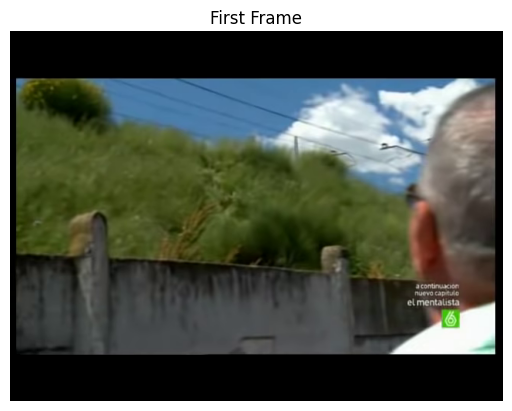

In [18]:
# Convert the frame from BGR to RGB
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Plot the first frame using matplotlib
plt.imshow(frame_rgb)
plt.axis("off")  # Turn off axis labels and ticks
plt.title("First Frame")
plt.show()

# Transfer dataset to hard drive

```{bash}
cd /Volumes/Seagate David Amat/Datasets/deepsetstats
cp -rv /Users/davidamat/Documents/Projects/deepsetstats/videos/test_tennis .
# changing test_tennis by tennistv
```